Correlation between NBA rookie points and collegiate player points: 0.1626788736890184


C:\Users\Wally\AppData\Local\Temp\ipykernel_12676\3373289908.py:9: DtypeWarning: Columns (0,1,2,25,26,33,64) have mixed types. Specify dtype option on import or set low_memory=False.
  collegiate_players = pd.read_csv("College.csv")


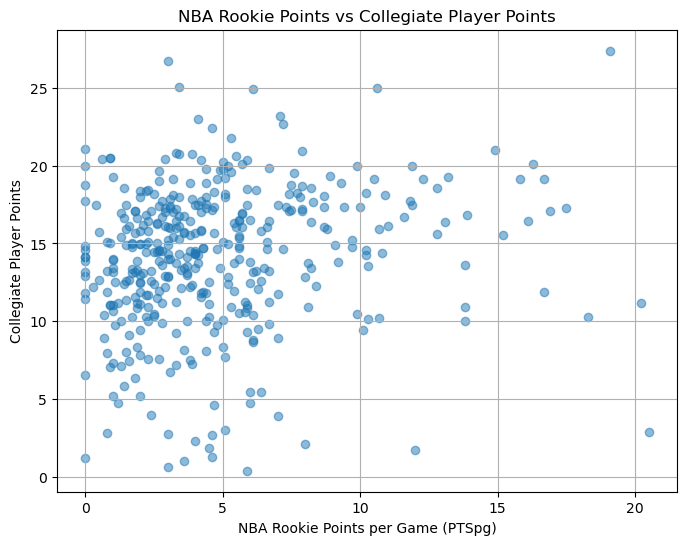

In [1]:
# ---------- Points ----------
import pandas as pd
import matplotlib.pyplot as plt

# Load NBA rookies dataset
nba_rookies = pd.read_csv("NBA.csv")

# Load collegiate players dataset
collegiate_players = pd.read_csv("College.csv")

# Calculate correlation between points columns
correlation = nba_rookies['PTSpg'].corr(collegiate_players['pts'])

print("Correlation between NBA rookie points and collegiate player points:", correlation)

# Drop rows with missing values in 'PTSpg' and 'pts' columns
nba_rookies_clean = nba_rookies.dropna(subset=['PTSpg'])
collegiate_players_clean = collegiate_players.dropna(subset=['pts'])

# Ensure both arrays have the same length
min_length = min(len(nba_rookies_clean), len(collegiate_players_clean))
nba_rookies_clean = nba_rookies_clean[:min_length]
collegiate_players_clean = collegiate_players_clean[:min_length]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(nba_rookies_clean['PTSpg'], collegiate_players_clean['pts'], alpha=0.5)
plt.title("NBA Rookie Points vs Collegiate Player Points")
plt.xlabel("NBA Rookie Points per Game (PTSpg)")
plt.ylabel("Collegiate Player Points")
plt.grid(True)
plt.show()

Correlation between NBA rookie points and collegiate player assists: 0.5705358318894614


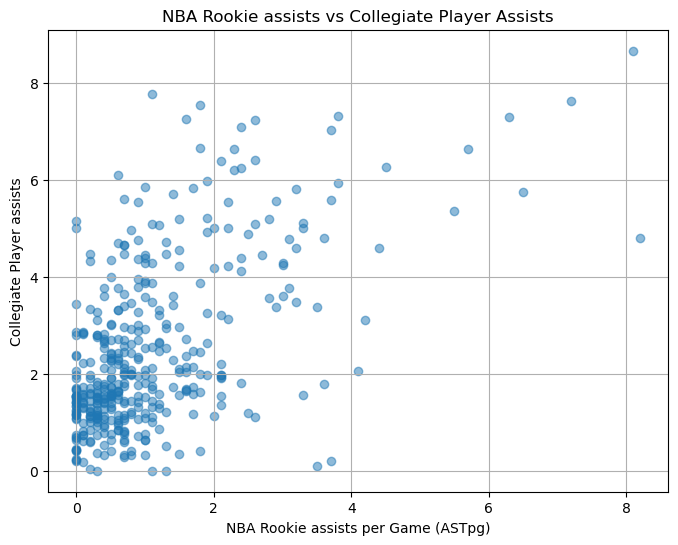

In [2]:
# ---------- Assists ----------
correlation = nba_rookies['ASTpg'].corr(collegiate_players['ast'])

print("Correlation between NBA rookie points and collegiate player assists:", correlation)

# Drop rows with missing values in 'ASTpg' and 'ast' columns
nba_rookies_clean = nba_rookies.dropna(subset=['ASTpg'])
collegiate_players_clean = collegiate_players.dropna(subset=['ast'])

# Ensure both arrays have the same length
min_length = min(len(nba_rookies_clean), len(collegiate_players_clean))
nba_rookies_clean = nba_rookies_clean[:min_length]
collegiate_players_clean = collegiate_players_clean[:min_length]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(nba_rookies_clean['ASTpg'], collegiate_players_clean['ast'], alpha=0.5)
plt.title("NBA Rookie assists vs Collegiate Player Assists")
plt.xlabel("NBA Rookie assists per Game (ASTpg)")
plt.ylabel("Collegiate Player assists")
plt.grid(True)
plt.show()

Correlation between NBA rookie points and collegiate player rebounds: 0.3481927516278981


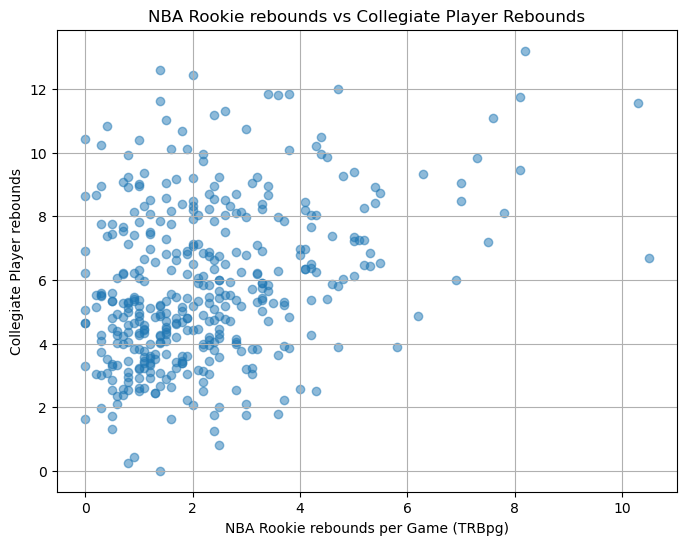

In [3]:
# ---------- Rebounds ----------
correlation = nba_rookies['TRBpg'].corr(collegiate_players['treb'])

print("Correlation between NBA rookie points and collegiate player rebounds:", correlation)

# Drop rows with missing values in 'TRBpg' and 'treb' columns
nba_rookies_clean = nba_rookies.dropna(subset=['TRBpg'])
collegiate_players_clean = collegiate_players.dropna(subset=['treb'])

# Ensure both arrays have the same length
min_length = min(len(nba_rookies_clean), len(collegiate_players_clean))
nba_rookies_clean = nba_rookies_clean[:min_length]
collegiate_players_clean = collegiate_players_clean[:min_length]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(nba_rookies_clean['TRBpg'], collegiate_players_clean['treb'], alpha=0.5)
plt.title("NBA Rookie rebounds vs Collegiate Player Rebounds")
plt.xlabel("NBA Rookie rebounds per Game (TRBpg)")
plt.ylabel("Collegiate Player rebounds")
plt.grid(True)
plt.show()

In [73]:
# ---------- KNN Classifier ----------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Preprocessing
X = nba_rookies.drop(['Player', 'Team', 'Year', 'Conf', 'Target'], axis=1)  # Assuming these columns are not used for prediction
y = nba_rookies['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for kNN: {accuracy}")

Accuracy for kNN: 0.9256198347107438


C:\Users\Wally\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [66]:
# ---------- Game Score ----------
# Clean the data as some players do not have recorded stats for the formula.
nba_rookies_gs = nba_rookies[(nba_rookies['Games'] != 0)]

# Average game score stat creation for NBA.
Tot_Game_Scores = []
for i in range(len(nba_rookies_gs.index)):
    # To help normalize the data, 2 fouls per game were used in the calculation.
    NBA_Game_Score = nba_rookies_gs['PTSpg'][i]+(0.4*nba_rookies_gs['FGpg'][i])-(0.7*nba_rookies_gs['FGA'][i]/nba_rookies_gs['Games'][i])-(0.4*(nba_rookies_gs['FTA'][i]-nba_rookies_gs['FT'][i])/nba_rookies_gs['Games'][i])+(0.7*nba_rookies_gs['ORBpg'][i])-(0.3*nba_rookies_gs['DRBpg'][i])+nba_rookies_gs['STLpg'][i]+(0.7*nba_rookies_gs['ASTpg'][i])+(0.7*nba_rookies_gs['BLKpg'][i])-(0.4*2)-nba_rookies_gs['TOVpg'][i]
    Tot_Game_Scores.append(NBA_Game_Score)

nba_rookies_gs.insert(40, "GameScore", Tot_Game_Scores)

# Clean the data as some players do not have recorded stats for the formula.
collegiate_players_gs = collegiate_players[(collegiate_players['GP'] != 0)]

# Average game score stat creation for college.
Tot_Game_Scores_College = []
for i in range(len(collegiate_players_gs.index)):
    # To help normalize the data, 1.65 fouls per game were used in the calculation.
    College_Game_Score = collegiate_players_gs['pts'][i]+(0.4*(collegiate_players_gs['twoPM'][i]+collegiate_players_gs['TPM'][i])/collegiate_players_gs['GP'][i])-(0.7*(collegiate_players_gs['twoPA'][i]+collegiate_players_gs['TPA'][i])/collegiate_players_gs['GP'][i])-(0.4*(collegiate_players_gs['FTA'][i]-collegiate_players_gs['FTM'][i])/collegiate_players_gs['GP'][i])+(0.7*collegiate_players_gs['oreb'][i])-(0.3*collegiate_players_gs['dreb'][i])+collegiate_players_gs['stl'][i]+(0.7*collegiate_players_gs['ast'][i])+(0.7*collegiate_players_gs['blk'][i])-(0.4*1.65)-(collegiate_players_gs['ast'][i]/collegiate_players_gs['ast/tov'][i])
    Tot_Game_Scores_College.append(College_Game_Score)

collegiate_players_gs.insert(66, "GameScore", Tot_Game_Scores_College)

C:\Users\Wally\AppData\Local\Temp\ipykernel_12676\3175407030.py:21: RuntimeWarning: invalid value encountered in scalar divide
  College_Game_Score = collegiate_players_gs['pts'][i]+(0.4*(collegiate_players_gs['twoPM'][i]+collegiate_players_gs['TPM'][i])/collegiate_players_gs['GP'][i])-(0.7*(collegiate_players_gs['twoPA'][i]+collegiate_players_gs['TPA'][i])/collegiate_players_gs['GP'][i])-(0.4*(collegiate_players_gs['FTA'][i]-collegiate_players_gs['FTM'][i])/collegiate_players_gs['GP'][i])+(0.7*collegiate_players_gs['oreb'][i])-(0.3*collegiate_players_gs['dreb'][i])+collegiate_players_gs['stl'][i]+(0.7*collegiate_players_gs['ast'][i])+(0.7*collegiate_players_gs['blk'][i])-(0.4*1.65)-(collegiate_players_gs['ast'][i]/collegiate_players_gs['ast/tov'][i])


In [56]:
# Cleans the data for the collegiate players as there is a lot of unused data
collegiate_players_clean = collegiate_players_gs.iloc[:402]
collegiate_players_clean['GameScore'] = collegiate_players_clean['GameScore'].fillna(0)

C:\Users\Wally\AppData\Local\Temp\ipykernel_12676\1940459757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collegiate_players_clean['GameScore'] = collegiate_players_clean['GameScore'].fillna(0)


In [58]:
# ---------- Cosine Similarity ----------
import numpy as np

nba_vector = np.array(nba_rookies_gs['GameScore'])
college_vector = np.array(collegiate_players_clean['GameScore'])

dot_product = np.dot(nba_vector, college_vector)

norm_nba = np.linalg.norm(nba_vector)
norm_college = np.linalg.norm(college_vector)

cosine_similarity = dot_product / (norm_nba * norm_college)

print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.6656902618319446
